# wdbc.data

### B. Use data/breast_cancer.csv
Use LabelEncoder and MinMaxScalar and Use pipeline 
Then GridSearch on param_grid = dict(lr__C=[0.1, 1, 10])
using Logistic regression 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import * 
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [3]:
path = r"C:\Users\Subash\handson\Day_11\code\data\breast-cancer.csv"

In [4]:
#Loading data
cancer_data = pd.read_csv(path)

In [5]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer_data.shape

(569, 32)

In [7]:
cancer_data.size

18208

In [8]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
cancer_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
cancer_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [12]:
#preprocessing
#Encoding the target variable -> Categorical so LabelEncoding
le = LabelEncoder()
cancer_data['diagnosis'] = le.fit_transform(cancer_data['diagnosis']) 

In [13]:
#Loading data into X-> Input and y-> Output
X = cancer_data.drop(columns=['diagnosis'],axis = 1)
y = cancer_data['diagnosis']

In [14]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [15]:
#scaler
min_max = MinMaxScaler()

In [16]:
#model
lr = LogisticRegression()

In [17]:
#Creating a pipeline
pipe = Pipeline([
    ('scaler', min_max),
    ('lr', lr)
])

In [18]:
#Fitting the model and perform hyperparameter tuning using GridSearchCV with the pipeline
param_grid = dict(lr__C=[0.1, 1, 10])
cancer_model = GridSearchCV(pipe, param_grid, cv=5)
cancer_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 1, 10]})

In [19]:
#Training Score - Bias
cancer_model.score(X_train,y_train)

0.978515625

In [20]:
#Testing Score - Variance
cancer_model.score(X_test,y_test)

1.0

In [21]:
#best param 
cancer_model.best_params_

{'lr__C': 10}

In [22]:
y_train_pred = cancer_model.predict(X_train)

In [23]:
#training confusion-matrix
confusion_matrix(y_train,y_train_pred)

array([[321,   2],
       [  9, 180]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


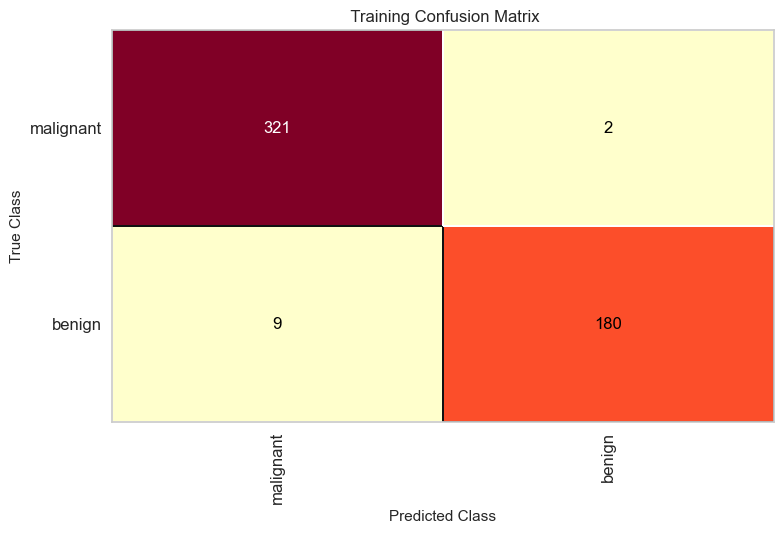

<Axes: title={'center': ' Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
cm = ConfusionMatrix(cancer_model, classes=["malignant", "benign"],title=" Training Confusion Matrix")
cm.score(X_train, y_train)
cm.show()

In [25]:
yHat = cancer_model.predict(X_test)

In [26]:
#testing confusion-matrix
confusion_matrix(y_test,yHat)

array([[34,  0],
       [ 0, 23]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


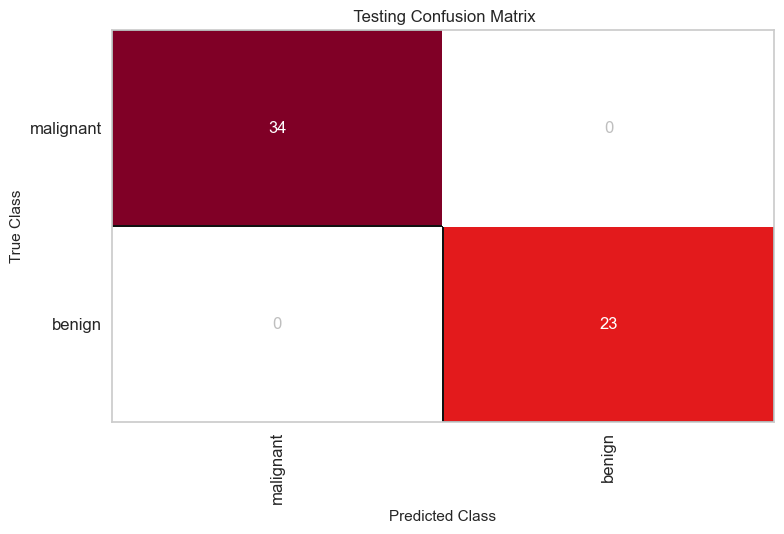

<Axes: title={'center': ' Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
cm = ConfusionMatrix(cancer_model, classes=["malignant", "benign"],title=" Testing Confusion Matrix")
cm.score(X_test, y_test)
cm.show()

In [28]:
best_model = cancer_model.best_estimator_
best_model

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LogisticRegression(C=10))])

In [29]:
best_model = cancer_model.best_estimator_.named_steps['lr']
best_model.coef_

array([[ 0.36183511,  2.36990875,  3.12490253,  2.27266035,  2.30170721,
         1.05940678, -1.22670093,  2.77017626,  3.58147647,  0.5167807 ,
        -1.73460087,  4.87215866,  0.00533128,  3.49492357,  2.75048012,
         0.59635701, -3.33921289, -0.66095291,  0.93088318, -1.06933836,
        -1.8915877 ,  4.83305344,  4.55122948,  4.07551581,  3.7121846 ,
         2.85823948,  0.33884695,  2.87673793,  4.34280939,  3.46824671,
         0.98924722]])

In [30]:
features = list(cancer_data.columns)
weights = list(zip(features,best_model.coef_[0]))
weights

[('id', 0.36183510737301783),
 ('diagnosis', 2.369908746504568),
 ('radius_mean', 3.1249025325080138),
 ('texture_mean', 2.2726603526521663),
 ('perimeter_mean', 2.3017072123607987),
 ('area_mean', 1.0594067806908785),
 ('smoothness_mean', -1.226700925304295),
 ('compactness_mean', 2.77017626459631),
 ('concavity_mean', 3.5814764687253633),
 ('concave points_mean', 0.5167807000101559),
 ('symmetry_mean', -1.7346008715186811),
 ('fractal_dimension_mean', 4.872158663741361),
 ('radius_se', 0.005331281421363679),
 ('texture_se', 3.4949235678136468),
 ('perimeter_se', 2.7504801193810224),
 ('area_se', 0.596357009156368),
 ('smoothness_se', -3.3392128886684156),
 ('compactness_se', -0.6609529064902673),
 ('concavity_se', 0.9308831794403517),
 ('concave points_se', -1.0693383556226164),
 ('symmetry_se', -1.8915877028756798),
 ('fractal_dimension_se', 4.833053444548936),
 ('radius_worst', 4.551229482528555),
 ('texture_worst', 4.075515809897735),
 ('perimeter_worst', 3.7121846036292117),
 ('a